In [140]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Question 1: 
In the first part, you estimate $\pi$ (the mathematical constant) by using a **Direct Sampling Algorithm** and determine the **Statistical Error** of your numerical calculation.

### Pi value Estimation

In [6]:
# I'm going to randomly sample points in the square of side 1 unit with uniform random sampling.

N = int(1e6)

points_square = np.random.random((N, 2))

In [30]:
# Check points in circe of diameter 1 unit.

idx = ((points_square - 0.5)**2).sum(axis=-1) < (0.5)**2

points_circle = points_square[idx]

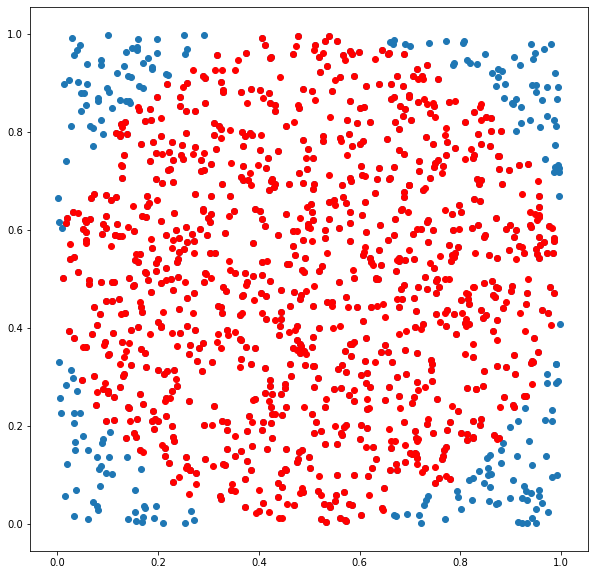

In [39]:
plt.rcParams['figure.figsize'] = 10, 10

n = 1000
plt.scatter(points_square[:n, 0], points_square[:n, 1])
plt.scatter(points_circle[:n, 0], points_circle[:n, 1], color='r')
plt.show()

In [37]:
pi_value = 4 * len(points_circle) / len(points_square)

print("Estimated Pi value is: ", pi_value)

Estimated Pi value is:  3.138952


### Error Estimation

In [61]:
def monte_carlo_pi(n_run = 1, n_trials = int(1e6)):
    '''
    N: No of points to be used for sampling.
    '''
    pi_vals = []
    for i in range(n_run):
        points_square = np.random.random((n_trials, 2))
        points_circle = points_square[((points_square - 0.5)**2).sum(axis=-1) < (0.5)**2]
        pi_vals.append(4 * len(points_circle) / len(points_square))
    
    return np.array(pi_vals)

In [100]:
data = [monte_carlo_pi(n_run = 500, n_trials = int(2**x)) for x in range(1, 17)]

In [101]:
rms_error = lambda x: np.sqrt(((x - np.pi)**2).mean())

In [107]:
x = list(range(1, 18))
y = [rms_error(x) for x in data]

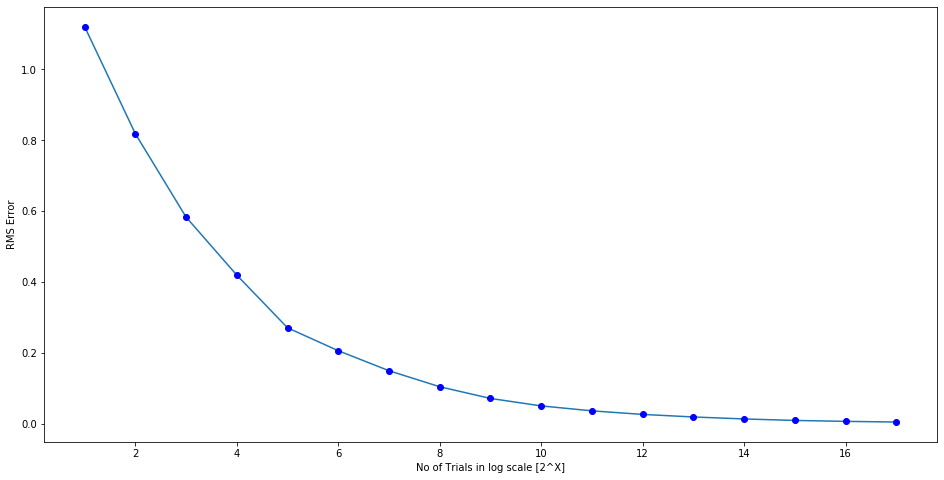

In [113]:
plt.rcParams['figure.figsize'] = 16, 8

plt.plot(x, y)
plt.plot(x, y, 'o', color='blue')
plt.xlabel("No of Trials in log scale [2^X]")
plt.ylabel("RMS Error")
plt.show()

# Question 2:

In the second part, you again estimate pi, but this time for a **Markov-chain algorithm**. The precision of the result depends on the step size delta, which itself changes the rejection rate. You will see that performance is best when delta is chosen such that about half of the proposed moves are accepted. This is called the "1/2 rule". It is a rule of thumb, not a mathematical law.

### Pi value Estimation

In [141]:
random.random()

0.21741985015683662

In [139]:
# I'm going to randomly sample points in the square of side 1 unit with uniform random sampling.

N = int(1e6)

points_square = []
x = np.random.random()
y = np.random.random()

for x in range(N):
    update = np.random.random((2, 1))
    new_point = seed_point + 
    
    if abs(new_point[0]) < 1.0 and abs(new_point[1]) < 1.0:
        points_square.append(new_point)
        seed_point = new_point
        
points_square = np.array(points_square)

ValueError: 'a' must be 1-dimensional

In [134]:
# Check points in circe of diameter 1 unit.

idx = ((points_square - 0.5)**2).sum(axis=-1) < (0.5)**2

points_circle = points_square[idx]

In [135]:
plt.rcParams['figure.figsize'] = 10, 10

n = 1000
plt.scatter(points_square[:n, 0], points_square[:n, 1])
plt.scatter(points_circle[:n, 0], points_circle[:n, 1], color='r')
plt.show()

IndexError: too many indices for array

In [138]:
points_circle

array([], shape=(0, 750209), dtype=float64)